## Table of Contents
* [1. Exploratory Data Analysis](#eda)
    * [1.1. Downloading data](#download)
    * [1.2. Data Evaluation](#evaluation)
* [2. Saving the base dataset](#base)
* [EXAMPLES FROM DC](#datacamp)


In [34]:
import opendatasets as od
import re

from datetime import datetime
from datetime import timezone
from datetime import date

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm


<a id="eda"></a>

# 1. Exploratory Data Analysis

<a id="download"></a>

## 1.1. Downloading data

In [ ]:
# https://data.open-power-system-data.org/time_series/2020-10-06

In [ ]:
'''
This data package contains different kinds of timeseries data relevant for power system modelling, 
namely electricity prices, electricity consumption (load) as well as wind and solar power generation 
and capacities. The data is aggregated either by country, control area or bidding zone. Geographical 
coverage includes the EU and some neighbouring countries. All variables are provided in hourly 
resolution. Where original data is available in higher resolution (half-hourly or quarter-hourly), 
it is provided in separate files. This package version only contains data provided by TSOs and power 
exchanges via ENTSO-E Transparency, covering the period 2015-mid 2020. See previous versions for 
historical data from a broader range of sources. All data processing is conducted in Python/pandas 
and has been documented in the Jupyter notebooks linked below.
'''

In [1]:
opsd_url = 'https://data.open-power-system-data.org/time_series/2020-10-06/time_series_60min_singleindex.csv'


In [5]:

od.download(opsd_url)

130342912it [00:55, 2350401.60it/s]                                             


In [6]:
# import zipfile

# path_to_zip_file = 'opsd-time_series-2020-10-06.zip'
# directory_to_extract_to = 'opsd-time_series-2020-10-06/'

# with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
#     zip_ref.extractall(directory_to_extract_to)

In [6]:
# path_to_csv = 'opsd-time_series-2020-10-06/opsd-time_series-2020-10-06/time_series_60min_singleindex.csv'
path_to_csv = 'time_series_60min_singleindex.csv'

df = pd.read_csv(path_to_csv)
df.head()

,utc_timestamp,cet_cest_timestamp,AT_load_actual_entsoe_transparency,AT_load_forecast_entsoe_transparency,AT_price_day_ahead,AT_solar_generation_actual,AT_wind_onshore_generation_actual,BE_load_actual_entsoe_transparency,BE_load_forecast_entsoe_transparency,BE_solar_generation_actual,...,SI_load_actual_entsoe_transparency,SI_load_forecast_entsoe_transparency,SI_solar_generation_actual,SI_wind_onshore_generation_actual,SK_load_actual_entsoe_transparency,SK_load_forecast_entsoe_transparency,SK_solar_generation_actual,SK_wind_onshore_generation_actual,UA_load_actual_entsoe_transparency,UA_load_forecast_entsoe_transparency
0,2014-12-31T23:00:00Z,2015-01-01T00:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-01T00:00:00Z,2015-01-01T01:00:00+0100,5946.0,6701.0,35.0,NaN,69.0,9484.0,9897.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-01T01:00:00Z,2015-01-01T02:00:00+0100,5726.0,6593.0,45.0,NaN,64.0,9152.0,9521.0,NaN,...,1045.47,816.0,NaN,1.17,2728.0,2860.0,3.8,NaN,NaN,NaN
3,2015-01-01T02:00:00Z,2015-01-01T03:00:00+0100,5347.0,6482.0,41.0,NaN,65.0,8799.0,9135.0,NaN,...,1004.79,805.0,NaN,1.04,2626.0,2810.0,3.8,NaN,NaN,NaN
4,2015-01-01T03:00:00Z,2015-01-01T04:00:00+0100,5249.0,6454.0,38.0,NaN,64.0,8567.0,8909.0,NaN,...,983.79,803.0,NaN,1.61,2618.0,2780.0,3.8,NaN,NaN,NaN


## 1.2 Exploration

In [7]:
df.isnull().sum()

utc_timestamp                               0
cet_cest_timestamp                          0
AT_load_actual_entsoe_transparency          1
AT_load_forecast_entsoe_transparency        1
AT_price_day_ahead                      17556
                                        ...  
SK_load_forecast_entsoe_transparency        3
SK_solar_generation_actual                391
SK_wind_onshore_generation_actual       40722
UA_load_actual_entsoe_transparency      24766
UA_load_forecast_entsoe_transparency    24988
Length: 300, dtype: int64

In [ ]:
# removing the big dataset

import os

os.remove(path_to_csv)

## 2. Creating the German dataset

In [11]:
german_columns = [col for col in list(df) 
                  if re.search('DE_', col) 
                  and not re.search('DE_LU_', col)
                  and not re.search('_amprion_', col)
                  and not re.search('_tennet_', col)
                  and not re.search('_transnetbw_', col)
                  and not re.search('_50hertz_', col)
                 ]
german_columns

['DE_load_actual_entsoe_transparency',
 'DE_load_forecast_entsoe_transparency',
 'DE_solar_capacity',
 'DE_solar_generation_actual',
 'DE_solar_profile',
 'DE_wind_capacity',
 'DE_wind_generation_actual',
 'DE_wind_profile',
 'DE_wind_offshore_capacity',
 'DE_wind_offshore_generation_actual',
 'DE_wind_offshore_profile',
 'DE_wind_onshore_capacity',
 'DE_wind_onshore_generation_actual',
 'DE_wind_onshore_profile']

In [ ]:

'''
* DE_load_actual_entsoe_transparency
    - Description: Total load in Germany in MW as published on ENTSO-E Transparency Platform
* DE_load_forecast_entsoe_transparency
    - Description: Day-ahead load forecast in Germany in MW as published on ENTSO-E Transparency Platform
    
* DE_solar_capacity
    - Description: Electrical capacity of solar in Germany in MW
* DE_solar_generation_actual
    - Description: Actual solar generation in Germany in MW
* DE_solar_profile
    - Description: Share of solar capacity producing in Germany

* DE_wind_capacity
    - Description: Electrical capacity of wind in Germany in MW
* DE_wind_generation_actual
    - Description: Actual wind generation in Germany in MW
* DE_wind_profile
    - Description: Share of wind capacity producing in Germany
* DE_wind_offshore_capacity
    - Description: Electrical capacity of wind_offshore in Germany in MW
* DE_wind_offshore_generation_actual
    - Description: Actual wind_offshore generation in Germany in MW
* DE_wind_offshore_profile
    - Description: Share of wind_offshore capacity producing in Germany
* DE_wind_onshore_capacity
    - Description: Electrical capacity of wind_onshore in Germany in MW
* DE_wind_onshore_generation_actual
    - Description: Actual wind_onshore generation in Germany in MW
* DE_wind_onshore_profile
    - Description: Share of wind_onshore capacity producing in Germany
'''

What is **wind_offshore** and **wind_onshore**?

- **Offshore wind** farms generate electricity from wind blowing across the sea. They are considered more efficient than onshore wind farms, thanks to the higher speed of winds, greater consistency and lack of physical interference that the land or human-made objects can present.

- **Onshore wind** energy is the power that’s generated by wind turbines located on land driven by the natural movement of the air. You’ll often see onshore wind farms in fields or more rural areas, as they’re usually constructed in less-populated areas where buildings and obstacles don’t interrupt the air.

Link: https://www.nationalgrid.com/stories/energy-explained/onshore-vs-offshore-wind-energy#


In [12]:
ger_df = df[['cet_cest_timestamp'] + german_columns]
ger_df.head()

,cet_cest_timestamp,DE_load_actual_entsoe_transparency,DE_load_forecast_entsoe_transparency,DE_solar_capacity,DE_solar_generation_actual,DE_solar_profile,DE_wind_capacity,DE_wind_generation_actual,DE_wind_profile,DE_wind_offshore_capacity,DE_wind_offshore_generation_actual,DE_wind_offshore_profile,DE_wind_onshore_capacity,DE_wind_onshore_generation_actual,DE_wind_onshore_profile
0,2015-01-01T00:00:00+0100,NaN,NaN,37248.0,NaN,NaN,27913.0,NaN,NaN,667.0,NaN,NaN,27246.0,NaN,NaN
1,2015-01-01T01:00:00+0100,41151.0,39723.0,37248.0,NaN,NaN,27913.0,8852.0,0.3171,667.0,517.0,0.7744,27246.0,8336.0,0.3059
2,2015-01-01T02:00:00+0100,40135.0,38813.0,37248.0,NaN,NaN,27913.0,9054.0,0.3244,667.0,514.0,0.7710,27246.0,8540.0,0.3134
3,2015-01-01T03:00:00+0100,39106.0,38490.0,37248.0,NaN,NaN,27913.0,9070.0,0.3249,667.0,518.0,0.7761,27246.0,8552.0,0.3139
4,2015-01-01T04:00:00+0100,38765.0,38644.0,37248.0,NaN,NaN,27913.0,9163.0,0.3283,667.0,520.0,0.7793,27246.0,8643.0,0.3172


In [13]:
ger_df.shape

(50401, 15)

In [14]:
def fix_col_1(col):
    if re.findall('DE_(.*)', col):
        return re.findall('DE_(.*)', col)[0]
    else:
        return col

def fix_col_2(col):
    if re.findall('(.*)_entsoe_transparency', col):
        return re.findall('(.*)_entsoe_transparency', col)[0]
    else:
        return col

de_columns = list(ger_df)

for col in de_columns:
#     print()
#     print(col)
#     print(de_columns)
    ger_df[fix_col_1(fix_col_2(col))] = ger_df[col]
    if col != fix_col_1(fix_col_2(col)):
#         print('Need to delete: ', col)
        ger_df.drop(col, axis=1, inplace=True)
    
ger_df.head()

/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_4507/3204337857.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ger_df[fix_col_1(fix_col_2(col))] = ger_df[col]
/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_4507/3204337857.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ger_df[fix_col_1(fix_col_2(col))] = ger_df[col]
/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_4507/3204337857.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

,cet_cest_timestamp,load_actual,load_forecast,solar_capacity,solar_generation_actual,solar_profile,wind_capacity,wind_generation_actual,wind_profile,wind_offshore_capacity,wind_offshore_generation_actual,wind_offshore_profile,wind_onshore_capacity,wind_onshore_generation_actual,wind_onshore_profile
0,2015-01-01T00:00:00+0100,NaN,NaN,37248.0,NaN,NaN,27913.0,NaN,NaN,667.0,NaN,NaN,27246.0,NaN,NaN
1,2015-01-01T01:00:00+0100,41151.0,39723.0,37248.0,NaN,NaN,27913.0,8852.0,0.3171,667.0,517.0,0.7744,27246.0,8336.0,0.3059
2,2015-01-01T02:00:00+0100,40135.0,38813.0,37248.0,NaN,NaN,27913.0,9054.0,0.3244,667.0,514.0,0.7710,27246.0,8540.0,0.3134
3,2015-01-01T03:00:00+0100,39106.0,38490.0,37248.0,NaN,NaN,27913.0,9070.0,0.3249,667.0,518.0,0.7761,27246.0,8552.0,0.3139
4,2015-01-01T04:00:00+0100,38765.0,38644.0,37248.0,NaN,NaN,27913.0,9163.0,0.3283,667.0,520.0,0.7793,27246.0,8643.0,0.3172


In [15]:
ger_df.isnull().sum()

cet_cest_timestamp                    0
load_actual                           1
load_forecast                        25
solar_capacity                     6601
solar_generation_actual             104
solar_profile                      6705
wind_capacity                      6601
wind_generation_actual               75
wind_profile                       6676
wind_offshore_capacity             6601
wind_offshore_generation_actual      75
wind_offshore_profile              6676
wind_onshore_capacity              6601
wind_onshore_generation_actual       73
wind_onshore_profile               6674
dtype: int64

In [16]:
ger_df.notna().sum()

cet_cest_timestamp                 50401
load_actual                        50400
load_forecast                      50376
solar_capacity                     43800
solar_generation_actual            50297
solar_profile                      43696
wind_capacity                      43800
wind_generation_actual             50326
wind_profile                       43725
wind_offshore_capacity             43800
wind_offshore_generation_actual    50326
wind_offshore_profile              43725
wind_onshore_capacity              43800
wind_onshore_generation_actual     50328
wind_onshore_profile               43727
dtype: int64

In [74]:
# saving the dataset for Germany

ger_df.to_csv('germany_wind_and_solar.csv', sep='\t', encoding='utf-8', index=False)


### 2.2. Creating the daily German dataset 

In [87]:
ger_df2 = ger_df[list(ger_df)]

ger_df2['cet_dttm'] = ger_df2['cet_cest_timestamp'].apply(lambda x: datetime.fromisoformat(x[:-5]))
ger_df2['cet_dt'] = pd.to_datetime(pd.to_datetime(ger_df2['cet_dttm'], utc=True).dt.date)
ger_df2.head()

,cet_cest_timestamp,load_actual,load_forecast,solar_capacity,solar_generation_actual,solar_profile,wind_capacity,wind_generation_actual,wind_profile,wind_offshore_capacity,wind_offshore_generation_actual,wind_offshore_profile,wind_onshore_capacity,wind_onshore_generation_actual,wind_onshore_profile,cet_dttm,cet_dt
0,2015-01-01T00:00:00+0100,NaN,NaN,37248.0,NaN,NaN,27913.0,NaN,NaN,667.0,NaN,NaN,27246.0,NaN,NaN,2015-01-01 00:00:00,2015-01-01
1,2015-01-01T01:00:00+0100,41151.0,39723.0,37248.0,NaN,NaN,27913.0,8852.0,0.3171,667.0,517.0,0.7744,27246.0,8336.0,0.3059,2015-01-01 01:00:00,2015-01-01
2,2015-01-01T02:00:00+0100,40135.0,38813.0,37248.0,NaN,NaN,27913.0,9054.0,0.3244,667.0,514.0,0.7710,27246.0,8540.0,0.3134,2015-01-01 02:00:00,2015-01-01
3,2015-01-01T03:00:00+0100,39106.0,38490.0,37248.0,NaN,NaN,27913.0,9070.0,0.3249,667.0,518.0,0.7761,27246.0,8552.0,0.3139,2015-01-01 03:00:00,2015-01-01
4,2015-01-01T04:00:00+0100,38765.0,38644.0,37248.0,NaN,NaN,27913.0,9163.0,0.3283,667.0,520.0,0.7793,27246.0,8643.0,0.3172,2015-01-01 04:00:00,2015-01-01


In [88]:
ger_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50401 entries, 0 to 50400
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   cet_cest_timestamp               50401 non-null  object        
 1   load_actual                      50400 non-null  float64       
 2   load_forecast                    50376 non-null  float64       
 3   solar_capacity                   43800 non-null  float64       
 4   solar_generation_actual          50297 non-null  float64       
 5   solar_profile                    43696 non-null  float64       
 6   wind_capacity                    43800 non-null  float64       
 7   wind_generation_actual           50326 non-null  float64       
 8   wind_profile                     43725 non-null  float64       
 9   wind_offshore_capacity           43800 non-null  float64       
 10  wind_offshore_generation_actual  50326 non-null  float64  

In [73]:
pct_columns = [col for col in list(ger_df2) if re.search('_profile', col)]
pct_columns

['solar_profile',
 'wind_profile',
 'wind_offshore_profile',
 'wind_onshore_profile']

In [89]:
ger_df2_agg = ger_df2.drop(pct_columns, axis=1)\
                .groupby(['cet_dt']).max().drop(['cet_cest_timestamp','cet_dttm'], axis=1)
ger_df2_agg.head()


,load_actual,load_forecast,solar_capacity,solar_generation_actual,wind_capacity,wind_generation_actual,wind_offshore_capacity,wind_offshore_generation_actual,wind_onshore_capacity,wind_onshore_generation_actual
cet_dt,,,,,,,,,,
2015-01-01,53672.0,53367.0,37248.0,4198.0,27913.0,22083.0,667.0,528.0,27246.0,21589.0
2015-01-02,61645.0,57268.0,37250.0,1899.0,27926.0,26590.0,667.0,512.0,27259.0,26110.0
2015-01-03,56259.0,52963.0,37250.0,1700.0,27926.0,24076.0,667.0,516.0,27259.0,23567.0
2015-01-04,54108.0,51443.0,37250.0,4579.0,27926.0,19098.0,667.0,514.0,27259.0,18593.0
2015-01-05,65130.0,60886.0,37252.0,5870.0,27939.0,15410.0,670.0,474.0,27268.0,14979.0


In [75]:
# ger_df2_agg.reset_index(inplace=True)
# ger_df2_agg.set_index('cet_dt', inplace=True)
# ger_df2_agg.head()

,load_actual,load_forecast,solar_capacity,solar_generation_actual,wind_capacity,wind_generation_actual,wind_offshore_capacity,wind_offshore_generation_actual,wind_onshore_capacity,wind_onshore_generation_actual
cet_dt,,,,,,,,,,
2015-01-01,53672.0,53367.0,37248.0,4198.0,27913.0,22083.0,667.0,528.0,27246.0,21589.0
2015-01-02,61645.0,57268.0,37250.0,1899.0,27926.0,26590.0,667.0,512.0,27259.0,26110.0
2015-01-03,56259.0,52963.0,37250.0,1700.0,27926.0,24076.0,667.0,516.0,27259.0,23567.0
2015-01-04,54108.0,51443.0,37250.0,4579.0,27926.0,19098.0,667.0,514.0,27259.0,18593.0
2015-01-05,65130.0,60886.0,37252.0,5870.0,27939.0,15410.0,670.0,474.0,27268.0,14979.0


In [90]:
ger_df_2015_i = ger_df2_agg.loc[date.fromisoformat('2015-01-01'):date.fromisoformat('2015-03-31')]
ger_df_2015_i

,load_actual,load_forecast,solar_capacity,solar_generation_actual,wind_capacity,wind_generation_actual,wind_offshore_capacity,wind_offshore_generation_actual,wind_onshore_capacity,wind_onshore_generation_actual
cet_dt,,,,,,,,,,
2015-01-01,53672.0,53367.0,37248.0,4198.0,27913.0,22083.0,667.0,528.0,27246.0,21589.0
2015-01-02,61645.0,57268.0,37250.0,1899.0,27926.0,26590.0,667.0,512.0,27259.0,26110.0
2015-01-03,56259.0,52963.0,37250.0,1700.0,27926.0,24076.0,667.0,516.0,27259.0,23567.0
2015-01-04,54108.0,51443.0,37250.0,4579.0,27926.0,19098.0,667.0,514.0,27259.0,18593.0
2015-01-05,65130.0,60886.0,37252.0,5870.0,27939.0,15410.0,670.0,474.0,27268.0,14979.0
...,...,...,...,...,...,...,...,...,...,...
2015-03-27,70544.0,68007.0,37481.0,11933.0,28824.0,13676.0,1062.0,750.0,27762.0,13295.0
2015-03-28,56534.0,58553.0,37482.0,16359.0,28840.0,17908.0,1074.0,1180.0,27765.0,16728.0
2015-03-29,53514.0,52672.0,37482.0,5580.0,28845.0,28000.0,1079.0,1177.0,27765.0,26951.0


In [91]:
ger_df2_agg.index

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-10',
               ...
               '2020-09-22', '2020-09-23', '2020-09-24', '2020-09-25',
               '2020-09-26', '2020-09-27', '2020-09-28', '2020-09-29',
               '2020-09-30', '2020-10-01'],
              dtype='datetime64[ns]', name='cet_dt', length=2101, freq=None)

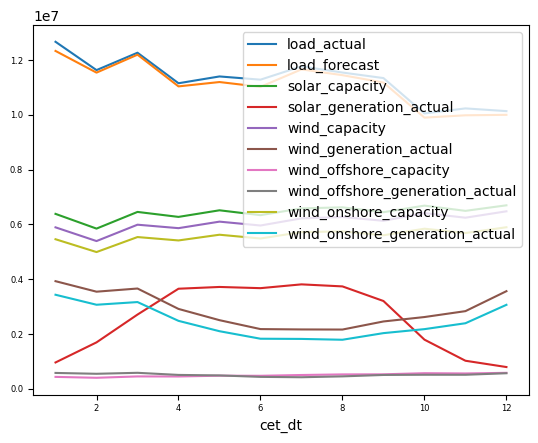

In [97]:

# Get month for each dates in the index
index_month = ger_df2_agg.index.month

# Compute the sum for each month of the year
ger_df2_agg_sum_by_month = ger_df2_agg.groupby(index_month).sum()

# Plot the sum...
ger_df2_agg_sum_by_month.plot(fontsize=6)
plt.legend(fontsize=10, loc='upper right')
plt.show()

## 4. Plots

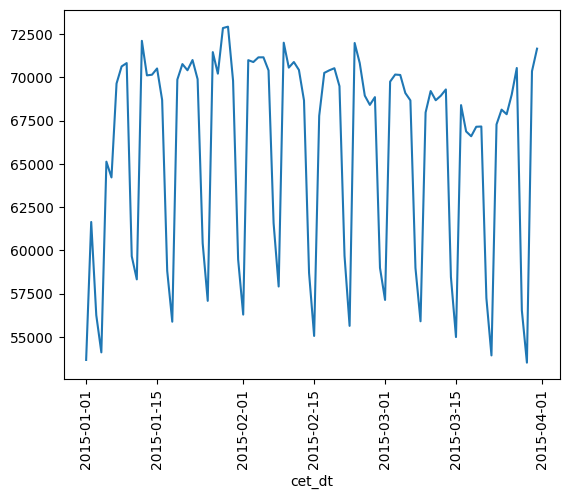

In [29]:
ger_df_2015_i['load_actual'].plot()
plt.xticks(rotation=90)
plt.show()

In [30]:
autocorrelation = ger_df_2015_i['load_actual'].autocorr()
autocorrelation

0.3485310595219947

In [38]:
pd.DataFrame(ger_df_2015_i['load_actual'])

,load_actual
cet_dt,
2015-01-01,53672.0
2015-01-02,61645.0
2015-01-03,56259.0
2015-01-04,54108.0
2015-01-05,65130.0
...,...
2015-03-27,70544.0
2015-03-28,56534.0
2015-03-29,53514.0


In [42]:
# Perform time series decompositon
decomposition_load_actual = sm.tsa.seasonal_decompose(pd.DataFrame(ger_df_2015_i['load_actual']).asfreq('D'), model = 'additive')
# asfreq('D') - D = daily

# Print the seasonality component
print(decomposition_load_actual.seasonal)

cet_dt
2015-01-01    3797.345238
2015-01-02    3112.035714
2015-01-03   -7290.904762
2015-01-04   -9879.702381
2015-01-05    3477.821429
                 ...     
2015-03-27    3112.035714
2015-03-28   -7290.904762
2015-03-29   -9879.702381
2015-03-30    3477.821429
2015-03-31    3163.880952
Freq: D, Name: seasonal, Length: 90, dtype: float64


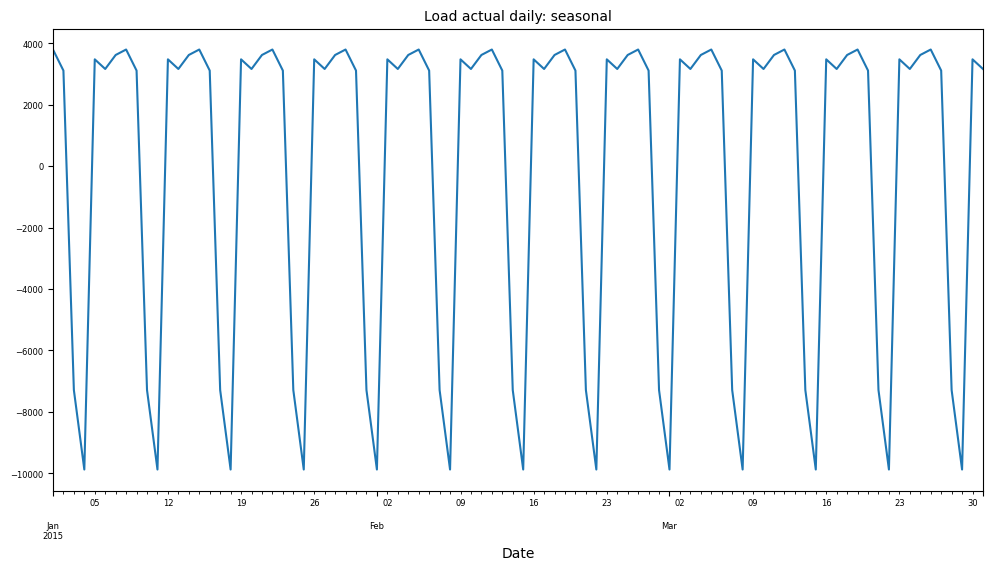

In [46]:
# Extract the seasonal component
seasonal = decomposition_load_actual.seasonal

# Plot the values of the seasonal
ax = seasonal.plot(figsize=(12, 6), fontsize=6)

# Specify axis labels
ax.set_xlabel('Date', fontsize=10)
ax.set_title('Load actual daily: seasonal', fontsize=10)
plt.show()

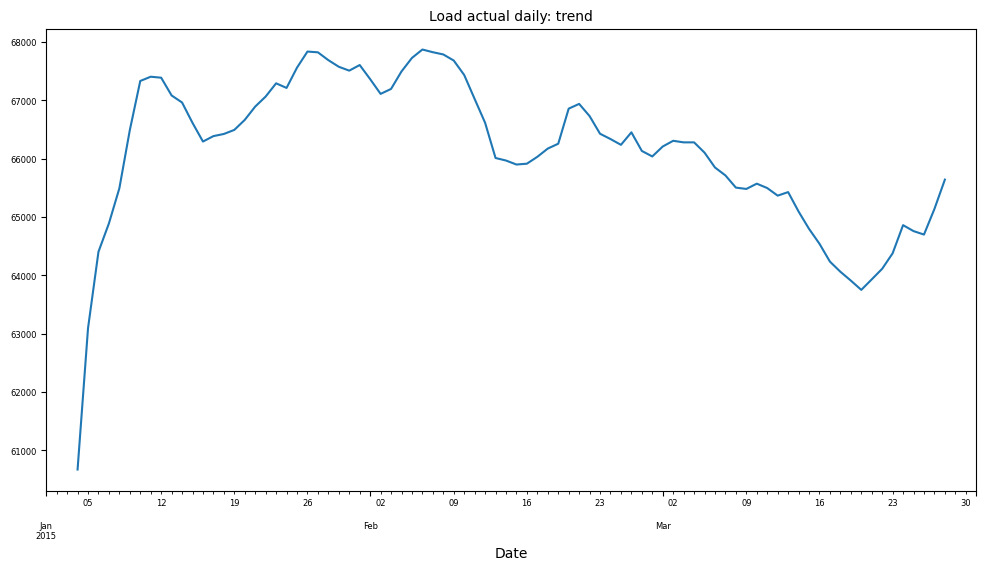

In [44]:
# Extract the trend component
trend = decomposition_load_actual.trend

# Plot the values of the trend
ax = trend.plot(figsize=(12, 6), fontsize=6)

# Specify axis labels
ax.set_xlabel('Date', fontsize=10)
ax.set_title('Load actual daily: trend', fontsize=10)
plt.show()

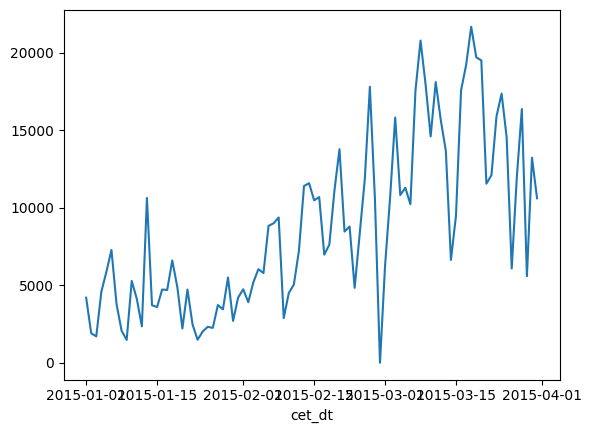

In [31]:
ger_df_2015_i['solar_generation_actual'].plot()
plt.show()

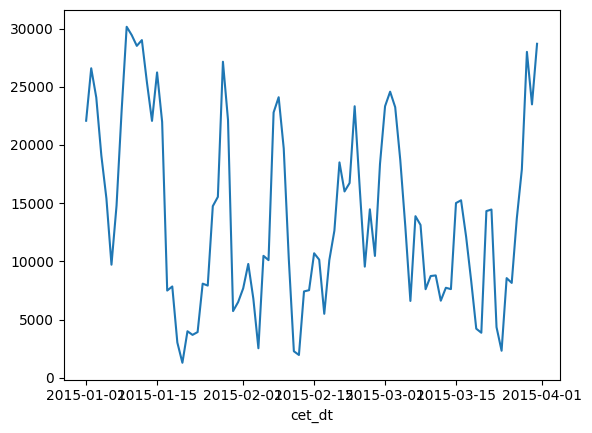

In [32]:
ger_df_2015_i['wind_generation_actual'].plot()
plt.show()

In [91]:
correlation_solar_wind = ger_df_2015_i['solar_generation_actual'].corr(ger_df_2015_i['wind_generation_actual'])
print(correlation_solar_wind)

-0.21745677774954042


In [100]:
ger_df3 = ger_df2_agg[list(ger_df2_agg)]

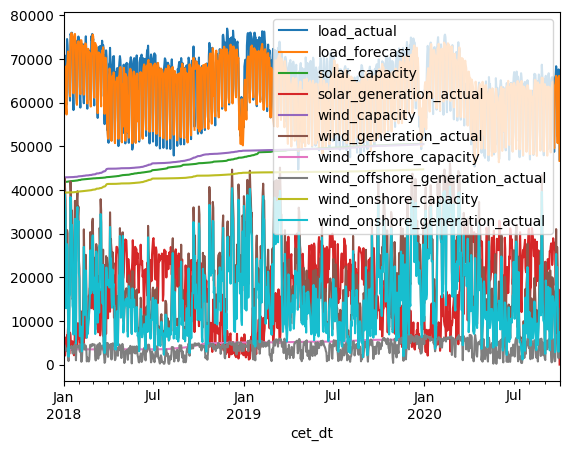

In [103]:
ger_df3_subset_1 = ger_df3['2018':'2020']
ax = ger_df3_subset_1.plot(fontsize=10) # color='blue'
plt.show()

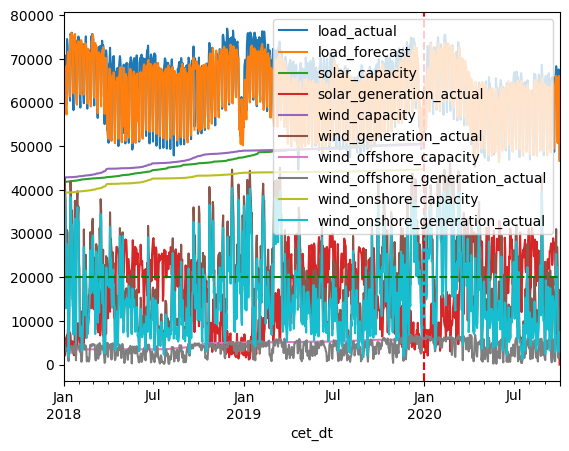

In [104]:
# Plot your the discoveries time series
ax = ger_df3_subset_1.plot(fontsize=10) # color='blue'

# Add a red vertical line
ax.axvline('2020-01-01', color='red', linestyle='--')

# Add a green horizontal line
ax.axhline(20000, color='green', linestyle='--')

plt.show()

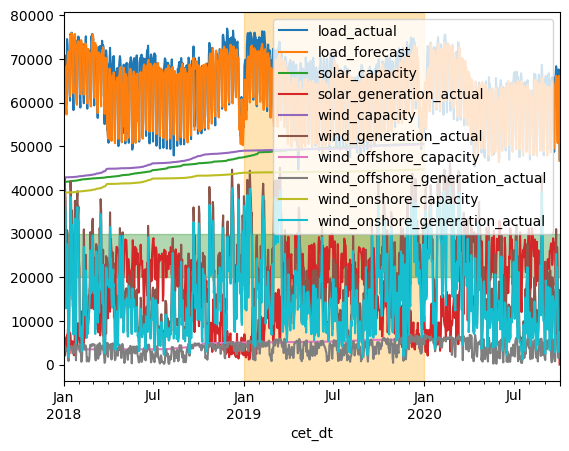

In [105]:
# Plot your the discoveries time series
ax = ger_df3_subset_1.plot(fontsize=10) # color='blue'

# Add a vertical red shaded region
ax.axvspan('2019-01-01', '2020-01-01', color='orange', alpha=0.3)

# Add a horizontal green shaded region
ax.axhspan(20000, 30000, color='green', alpha=0.3)

plt.show()

<a id="datacamp"></a>

# EXAMPLES FROM TS COURSES

In [ ]:
# Compute the 52 weeks rolling mean of the co2_levels DataFrame
ma = co2_levels.rolling(window=52).mean()

# Compute the 52 weeks rolling standard deviation of the co2_levels DataFrame
mstd = co2_levels.rolling(window=52).std()

# Add the upper bound column to the ma DataFrame
ma['upper'] = ma['co2'] + (2 * mstd['co2'])

# Add the lower bound column to the ma DataFrame
ma['lower'] = ma['co2'] - (2 * mstd['co2'])

# Plot the content of the ma DataFrame
ax = ma.plot(linewidth=0.8, fontsize=6)

# Specify labels, legend, and show the plot
ax.set_xlabel('Date', fontsize=10)
ax.set_ylabel('CO2 levels in Mauai Hawaii', fontsize=10)
ax.set_title('Rolling mean and variance of CO2 levels\nin Mauai Hawaii from 1958 to 2001', fontsize=10)
plt.show()

In [ ]:
# Get month for each dates in the index of co2_levels
index_month = co2_levels.index.month

# Compute the mean CO2 levels for each month of the year
mean_co2_levels_by_month = co2_levels.groupby(index_month).mean()

# Plot the mean CO2 levels for each month of the year
mean_co2_levels_by_month.plot(fontsize=6)

# Specify the fontsize on the legend
plt.legend(fontsize=10)

# Show plot
plt.show()

In [ ]:
# Print out summary statistics of the co2_levels DataFrame
print(co2_levels.describe())

# Print out the minima of the co2 column in the co2_levels DataFrame
print(co2_levels.describe().loc['min'])

# Print out the maxima of the co2 column in the co2_levels DataFrame
print(co2_levels.describe().loc['max'])

In [ ]:
# Generate a histogram
ax = co2_levels.plot(kind='hist', bins=50, fontsize=6)

# Set the labels and display the plot
ax.set_xlabel('CO2', fontsize=10)
ax.set_ylabel('Histogram of CO2 levels in Maui Hawaii', fontsize=10)
plt.legend(fontsize=10)
plt.show()

In [ ]:
# Display density plot of CO2 levels values
ax = co2_levels.plot(kind='density', linewidth=4, fontsize=6)

# Annotate x-axis labels
ax.set_xlabel('CO2', fontsize=10)

# Annotate y-axis labels
ax.set_ylabel('Density plot of CO2 levels in Maui Hawaii', fontsize=10)

plt.show()

### AUTOCORRELATION

In [ ]:
# Import required libraries
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from statsmodels.graphics import tsaplots

# Display the autocorrelation plot of your time series
fig = tsaplots.plot_acf(co2_levels['co2'], lags=24)

# Show plot
plt.show()

### SEASONALITY< TREND< NOISE

In [ ]:
# Import statsmodels.api as sm
import statsmodels.api as sm

# Perform time series decompositon
decomposition = sm.tsa.seasonal_decompose(co2_levels)

# Print the seasonality component
print(decomposition.seasonal)

In [ ]:
# Extract the trend component
trend = decomposition.trend

# Plot the values of the trend
ax = trend.plot(figsize=(12, 6), fontsize=6)

# Specify axis labels
ax.set_xlabel('Date', fontsize=10)
ax.set_title('Seasonal component the CO2 time-series', fontsize=10)
plt.show()

### MULTIPLE TS

In [ ]:
# Read in meat DataFrame
meat = pd.read_csv(url_meat)

# Review the first five lines of the meat DataFrame
print(meat.head(5))

# Convert the date column to a datestamp type
meat['date'] = pd.to_datetime(meat['date'])

# Set the date column as the index of your DataFrame meat
meat = meat.set_index('date')

# Print the summary statistics of the DataFrame
print(meat.describe())

In [ ]:
# Plot an area chart
ax = meat.plot.area(fontsize=12)

# Additional customizations
ax.set_xlabel('Date')
ax.legend(fontsize=15)

# Show plot
plt.show()

In [ ]:
# Plot time series dataset using the PuOr color palette
ax = meat.plot(colormap='PuOr', fontsize=15)

# Additional customizations
ax.set_xlabel('Date')
ax.legend(fontsize=18)

# Show plot
plt.show()

In [ ]:
# Plot the meat data
ax = meat.plot(fontsize=6, linewidth=1)

# Add x-axis labels
ax.set_xlabel('Date', fontsize=6)

# Add summary table information to the plot
ax.table(cellText=meat_mean.values,
         colWidths = [0.15]*len(meat_mean.columns),
         rowLabels=meat_mean.index,
         colLabels=meat_mean.columns,
         loc='top')

# Specify the fontsize and location of your legend
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=3, fontsize=6)

# Show plot
plt.show()

In [ ]:
# Create a facetted graph with 2 rows and 4 columns
meat.plot(subplots=True, 
          layout=(2,4), 
          sharex=False, 
          sharey=False, 
          colormap='viridis', 
          fontsize=2, 
          legend=False, 
          linewidth=0.2)

plt.show()

### CORRELATIONS

In [ ]:
# Compute the correlation between the pork, veal and turkey columns using the pearson method
print(meat[['pork', 'veal', 'turkey']].corr(method='pearson'))


In [ ]:
# Import seaborn library
import seaborn as sns

# Get correlation matrix of the meat DataFrame: corr_meat
corr_meat = meat.corr(method='spearman')

# Customize the heatmap of the corr_meat correlation matrix
sns.heatmap(corr_meat,
            annot=True,
            linewidths=0.4,
            annot_kws={"size": 10})

plt.xticks(rotation=90)
plt.yticks(rotation=0) 
plt.show()

In [ ]:
# Import seaborn library
import seaborn as sns

# Get correlation matrix of the meat DataFrame
corr_meat = meat.corr(method='pearson')

# Customize the heatmap of the corr_meat correlation matrix and rotate the x-axis labels
fig = sns.clustermap(corr_meat,
                     row_cluster=True,
                     col_cluster=True,
                     figsize=(10, 10))

plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()

### AGAIN from the very BEGINNING

In [ ]:
# Read in jobs file
jobs = pd.read_csv(url_jobs)

# Print first five lines of your DataFrame
print(jobs.head(5))

# Check the type of each column in your DataFrame
print(jobs.dtypes)

# Convert datestamp column to a datetime object
jobs['datestamp'] = pd.to_datetime(jobs['datestamp'])

# Set the datestamp columns as the index of your DataFrame
jobs = jobs.set_index('datestamp')

# Check the number of missing values in each column
print(jobs.isnull().sum())

In [ ]:
# Generate a boxplot
jobs.boxplot(fontsize=6, vert=False)
plt.show()

# Generate numerical summaries
print(jobs.describe())



In [ ]:
# A subset of the jobs DataFrame
jobs_subset = jobs[['Finance', 'Information', 'Manufacturing', 'Construction']]

# Print the first 5 rows of jobs_subset
print(jobs_subset.head())

# Create a facetted graph with 2 rows and 2 columns
ax = jobs_subset.plot(subplots=True,
                      layout=(2,2),
                      sharex=False,
                      sharey=False,
                      linewidth=0.7,
                      fontsize=3,
                      legend=False)

plt.show()

In [ ]:
# Plot all time series in the jobs DataFrame
ax = jobs.plot(colormap='Spectral', fontsize=6, linewidth=0.8)

# Set labels and legend
ax.set_xlabel('Date', fontsize=10)
ax.set_ylabel('Unemployment Rate', fontsize=10)
ax.set_title('Unemployment rate of U.S. workers by industry', fontsize=10)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Annotate your plots with vertical lines
ax.axvline('2001-07-01', color='blue', linestyle='--', linewidth=0.8)
ax.axvline('2008-09-01', color='blue', linestyle='--', linewidth=0.8)

# Show plot
plt.show()

In [ ]:
# Extract the month from the index of jobs
index_month = jobs.index.month

# Compute the mean unemployment rate for each month
jobs_by_month = jobs.groupby(index_month).mean()

# Plot the mean unemployment rate for each month
ax = jobs_by_month.plot(fontsize=6, linewidth=1)

# Set axis labels and legend
ax.set_xlabel('Month', fontsize=10)
ax.set_ylabel('Mean unemployment rate', fontsize=10)
ax.legend(bbox_to_anchor=(0.8, 0.6), fontsize=10)
plt.show()

In [ ]:
# Initialize dictionary
jobs_decomp = {}

# Get the names of each time series in the DataFrame
jobs_names = jobs.columns

# Run time series decomposition on each time series of the DataFrame
for ts in jobs_names:
    ts_decomposition = sm.tsa.seasonal_decompose(jobs[ts])
    jobs_decomp[ts] = ts_decomposition

In [ ]:
# Extract the seasonal values for the decomposition of each time series
for ts in jobs_names:
    jobs_seasonal[ts] = jobs_decomp[ts].seasonal
    
# Create a DataFrame from the jobs_seasonal dictionary
seasonality_df = pd.DataFrame(jobs_seasonal)

# Remove the label for the index
seasonality_df.index.name = None

# Create a faceted plot of the seasonality_df DataFrame
seasonality_df.plot(subplots=True,
                   layout=(4,4),
                   sharey=False,
                   fontsize=2,
                   linewidth=0.3,
                   legend=False)

# Show plot
plt.show()

In [ ]:
# Get correlation matrix of the seasonality_df DataFrame
seasonality_corr = seasonality_df.corr(method='spearman')

# Customize the clustermap of the seasonality_corr correlation matrix
fig = sns.clustermap(seasonality_corr, annot=True, annot_kws={"size": 4}, linewidths=.4, figsize=(15, 10))
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.show()

# Print the correlation between the seasonalities of the Government and Education & Health industries
print(seasonality_corr)

In [ ]:
# ARIMA

In [ ]:
# Import modules
import matplotlib.pyplot as plt
import pandas as pd

# Load in the time series
candy = pd.read_csv('candy_production.csv', 
            index_col='date',
            parse_dates=True)

# Plot and show the time series on axis ax1
fig, ax1 = plt.subplots()
candy.plot(ax=ax1)
plt.show()

In [ ]:
# Split the data into a train and test set
candy_train = candy.loc[:'2006']
candy_test = candy.loc['2007':]

# Create an axis
fig, ax = plt.subplots()

# Plot the train and test sets on the axis ax
candy_train.plot(ax=ax)
candy_test.plot(ax=ax)
plt.show()

In [ ]:
# Import augmented dicky-fuller test function
from statsmodels.tsa.stattools import adfuller

# Run test
result = adfuller(earthquake['earthquakes_per_year'])

# Print test statistic
print(result[0])

# Print p-value
print(result[1])

# Print critical values
print(result[4]) 

In [ ]:
# Run the ADF test on the time series
result = adfuller(city['city_population'])

# Plot the time series
fig, ax = plt.subplots()
city.plot(ax=ax)
plt.show()

# Print the test statistic and the p-value
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Calculate the first difference of the time series
city_stationary = city.diff().dropna()

# Run ADF test on the differenced time series
result = adfuller(city_stationary['city_population'])

# Plot the differenced time series
fig, ax = plt.subplots()
city_stationary.plot(ax=ax)
plt.show()

# Print the test statistic and the p-value
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Calculate the second difference of the time series
city_stationary = city.diff().dropna().diff().dropna()

# Run ADF test on the differenced time series
result = adfuller(city_stationary['city_population'])

# Plot the differenced time series
fig, ax = plt.subplots()
city_stationary.plot(ax=ax)
plt.show()

# Print the test statistic and the p-value
print('ADF Statistic:', result[0])
print('p-value:', result[1])

In [ ]:
# Calculate the first difference and drop the nans
amazon_diff = amazon.diff()
amazon_diff = amazon_diff.dropna()

# Run test and print
result_diff = adfuller(amazon_diff['close'])
print(result_diff)

# Calculate log-return and drop nans
amazon_log = np.log(amazon)
amazon_log = amazon_log.dropna()

# Run test and print
result_log = adfuller(amazon_log['close'])
print(result_log)

In [ ]:
# NEXT>>>

In [ ]:
# Instantiate the model
model = ARIMA(earthquake, order=(3,0,1))

# Fit the model
results = model.fit()

# Print model fit summary
print(results.summary())

In [ ]:
# Generate predictions
one_step_forecast = results.get_prediction(start=-30)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# Get confidence intervals of  predictions
confidence_intervals = one_step_forecast.conf_int()

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower close']
upper_limits = confidence_intervals.loc[:,'upper close']

# Print best estimate  predictions
print(mean_forecast)

# plot the amazon data
plt.plot(amazon.index, amazon, label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Amazon Stock Price - Close USD')
plt.legend()
plt.show()



In [ ]:
# Generate predictions
dynamic_forecast = results.get_prediction(start=-30, dynamic=True)

# Extract prediction mean
mean_forecast = dynamic_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = dynamic_forecast.conf_int()

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower close']
upper_limits = confidence_intervals.loc[:,'upper close']

# Print best estimate predictions
print(mean_forecast)



In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Create ARIMA(2,1,2) model
arima = ARIMA(amazon, order=(2,1,2))

# Fit ARIMA model
arima_results = arima.fit()

# Make ARIMA forecast of next 10 values
arima_value_forecast = arima_results.get_forecast(steps=10).predicted_mean

# Print forecast
print(arima_value_forecast)

In [ ]:
# Import
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
 
# Plot the ACF of df
plot_acf(df, lags=10, zero=False, ax=ax1)

# Plot the PACF of df
plot_pacf(df, lags=10, zero=False, ax=ax2)

plt.show()

In [ ]:
# Create empty list to store search results
order_aic_bic=[]

# Loop over p values from 0-2
for p in range(3):
  # Loop over q values from 0-2
    for q in range(3):
      	# create and fit ARMA(p,q) model
        model = ARIMA(df, order=(p,0,q))
        results = model.fit()
        
        # Append order and results tuple
        order_aic_bic.append((p,q, results.aic, results.bic))

In [ ]:
# Construct DataFrame from order_aic_bic
order_df = pd.DataFrame(order_aic_bic, 
                        columns=['p', 'q', 'AIC', 'BIC'])

# Print order_df in order of increasing AIC
print(order_df.sort_values('AIC'))

# Print order_df in order of increasing BIC
print(order_df.sort_values('BIC'))

In [ ]:
# Loop over p values from 0-2
for p in range(3):
    # Loop over q values from 0-2
    for q in range(3):
      
        try:
            # create and fit ARMA(p,q) model
            model = ARIMA(earthquake, order=(p,0,q))
            results = model.fit()
            
            # Print order and results
            print(p, q, results.aic, results.bic)
            
        except:
            print(p, q, None, None)     

### Model diagnostics

In [ ]:
# Fit model
model = ARIMA(earthquake, order=(1,0,1))
results = model.fit()

# Calculate the mean absolute error from residuals
mae = np.mean(np.abs(results.resid))

# Print mean absolute error
print(mae)

# Make plot of time series for comparison
earthquake.plot()
plt.show()

In [ ]:
# Create and fit model
model1 = ARIMA(df, order=(3,0,1))
results1 = model1.fit()

# Print summary
print(results1.summary())

In [ ]:
# Prob(Q) is larger than 0.05. We shouldn't reject the null that the residuals are uncorrelated.
# Prob(Q) is smaller than 0.05. We should reject the null that the residuals are uncorrelated.

# Prob(JB) is not less than 0.05. We shouldn't reject the null that the residuals are normally distributed.

In [ ]:
# Create and fit model
model = ARIMA(df, order=(1,1,1))
results = model.fit()

# Create the 4 diagnostics plots
results.plot_diagnostics()
plt.show()

### Box-Jenkins method

In [ ]:
# Plot time series
savings.plot()
plt.show()

# Run Dicky-Fuller test
result = adfuller(savings['savings'])

# Print test statistic
print(result[0])

# Print p-value
print(result[1])


# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
 
# Plot the ACF of savings on ax1
plot_acf(savings, lags=10, zero=False, ax=ax1)

# Plot the PACF of savings on ax2
plot_pacf(savings, lags=10, zero=False, ax=ax2)

plt.show()


# Loop over p values from 0-3
for p in range(4):
  
  # Loop over q values from 0-3
    for q in range(4):
        try:
            # Create and fit ARMA(p,q) model
            model = ARIMA(savings, order=(p,0,q))
            results = model.fit()

            # Print p, q, AIC, BIC
            print(p,q, results.aic, results.bic)
        
        except:
            print(p, q, None, None)
        
        
# Create and fit model
model = ARIMA(savings, order=(1,0,2))
results = model.fit()

# Create the 4 diagostics plots
results.plot_diagnostics()
plt.show()

# Print summary
print(results.summary())

### Seasonal ARIMA

In [ ]:
# Import seasonal decompose
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform additive decomposition
decomp = seasonal_decompose(milk_production['pounds_per_cow'], 
                            period=12)

# Plot decomposition
decomp.plot()
plt.show()

In [ ]:
# Create figure and subplot
fig, ax1 = plt.subplots()

# Plot the ACF on ax1
plot_acf(water['water_consumers'], lags=25, zero=False,  ax=ax1)

# Show figure
plt.show()


# Subtract the rolling mean
water_2 = water - water.rolling(15).mean()

# Drop the NaN values
water_2 = water_2.dropna()

# Create figure and subplots
fig, ax1 = plt.subplots()

# Plot the ACF
plot_acf(water_2['water_consumers'], lags=25, zero=False, ax=ax1)

# Show figure
plt.show()

In [ ]:
# Import the SARIMAX class
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Create a SARIMA model
model = SARIMAX(df1, order=(1,0,0), seasonal_order=(1,1,0,7))

# Fit the model
results = model.fit()

# Print the results summary
print(results.summary())



In [ ]:
# Take the first and seasonal differences and drop NaNs
aus_employment_diff = aus_employment.diff().diff(12).dropna()

# Create the figure 
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,6))

# Plot the ACF on ax1
plot_acf(aus_employment_diff, lags=11, zero=False, ax=ax1)

# Plot the PACF on ax2
plot_pacf(aus_employment_diff, lags=11, zero=False, ax=ax2)

plt.show()


# Make list of lags
lags = [12, 24, 36, 48, 60]

# Create the figure 
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,6))

# Plot the ACF on ax1
plot_acf(aus_employment_diff, lags=lags[:5], ax=ax1)

# Plot the PACF on ax2
plot_pacf(aus_employment_diff, lags=lags[:5], ax=ax2)

plt.show()

In [ ]:
# Create ARIMA mean forecast
arima_pred = arima_results.get_forecast(steps=25)
arima_mean = arima_pred.predicted_mean

# Create SARIMA mean forecast
sarima_pred = sarima_results.get_forecast(steps=25)
sarima_mean = sarima_pred.predicted_mean

# Plot mean ARIMA and SARIMA predictions and observed
plt.plot(dates, sarima_mean, label='SARIMA')
plt.plot(dates, arima_mean, label='ARIMA')
plt.plot(wisconsin_test, label='observed')
plt.legend()
plt.show()

In [99]:
# Import pmdarima as pm
import pmdarima as pm


In [ ]:
# Create auto_arima model
model1 = pm.auto_arima(df1,
                      seasonal=True, m=7,
                      d=0, D=1, 
                 	  max_p=2, max_q=2,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True) 

# Print model summary
print(model1.summary())

In [ ]:
# Import joblib
import joblib

# Set model name
filename = "candy_model.pkl"

# Pickle it
joblib.dump(model, filename)

In [ ]:
'''
https://www.frontiersin.org/articles/10.3389/fenrg.2020.00016/full

(about solar-wind and load)
'''